In [45]:
import pandas as pd

In [46]:
df = pd.read_csv('fourCollections.csv', dtype={'collection_slug': 'str', 'asset_id': 'int', 'asset_name': 'str', 'owner_username': 'str', 'owner_address': 'str', 'event_type': 'str'})
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('collection_slug', axis=1,inplace=True)
df.drop('asset_contract_date', axis=1, inplace=True)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp']).dt.strftime('%m/%d/%Y %H:%M')
df.drop_duplicates(keep='first')
df = df[df['event_type'] == 'successful']

In [47]:
az = 'Azuki'
ba = 'Bored Ape Yacht Club'
mf = 'mfers'
cc = 'Crypto Coven'

az = df[df['collection_name'] == az].owner_address.unique()
ba = df[df['collection_name'] == ba].owner_address.unique()
mf = df[df['collection_name'] == mf].owner_address.unique()
cc = df[df['collection_name'] == cc].owner_address.unique()

In [48]:
# Individual collection count
iaz_count = az.shape[0]
iba_count = ba.shape[0]
imf_count = mf.shape[0]
icc_count = cc.shape[0]
print(iaz_count, iba_count, imf_count, icc_count)

4625 5990 5395 2618


In [49]:
# Intersection collection count
a = df[df['owner_address'].isin(df['owner_address'].value_counts()[df['owner_address'].value_counts() > 1].index)].owner_address.unique()

df_a = pd.DataFrame()

i = 0
I1 = 0
I2 = 0
I3 = 0
I4 = 0
I5 = 0
I6 = 0

for owner in a:
    temp = df[df['owner_address'] == a[i]]

    temp.reset_index(inplace=True)
    address = temp.owner_address[0]

    df_a = df_a.append(temp)

    mf_count = (temp[temp['collection_name'] == 'mfers'].count())
    mf = mf_count['collection_name']

    cc_count = (temp[temp['collection_name'] == 'Crypto Coven'].count())
    cc = cc_count['collection_name']

    ba_count = (temp[temp['collection_name'] == 'Bored Ape Yacht Club'].count())
    ba = ba_count['collection_name']

    az_count = (temp[temp['collection_name'] == 'Azuki'].count())
    az = az_count['collection_name']

    # I1 = MF & CC
    # I2 = MF & BA
    # I3 = MF & AZ
    # I4 = CC & BA
    # I5 = CC & AZ
    # I6 = BA & AZ

    if ((mf > 0) & (cc > 0)):
        I1 += 1
    elif ((mf > 0) & (ba > 0)):
        I2 += 1
    elif ((mf > 0) & (az > 0)):
        I3 += 1
    elif ((cc > 0) & (ba > 0)):
        I4 += 1
    elif ((cc > 0) & (az > 0)):
        I5 += 1
    elif ((ba > 0) & (az > 0)):
        I6 += 1
    i += 1

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = {'Azuki': iaz_count, 'Azuki & BAYC': I6 , 'Bored Ape Yacht Club': iba_count, 'BAYC & mfers':I2,
'mfers': imf_count, 'mfers & Crypto Coven':I1, 'mfers & Azuki':I3 , 'Crypto Coven':icc_count, 'Crypto Coven & Azuki': I5, 'Crypto Coven & BAYC':I4 }

<BarContainer object of 10 artists>

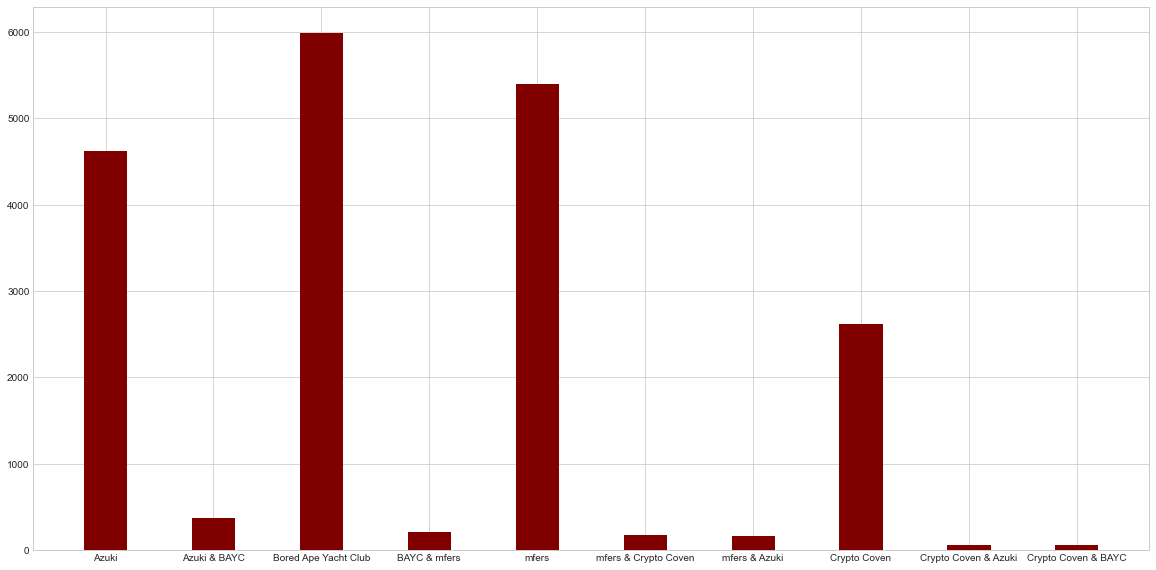

In [55]:
categories = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (20, 10))

plt.bar(categories, values, color='maroon', width = 0.4)